<a href="https://colab.research.google.com/github/ldlb10-cs/MAT421/blob/main/ModuleB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.4 ：Lagrange Polynomial Interpolation

*   Lagrange Polynomial Interpolation is a method used to construct a single polynomial that exactly passes through a set of given data points.



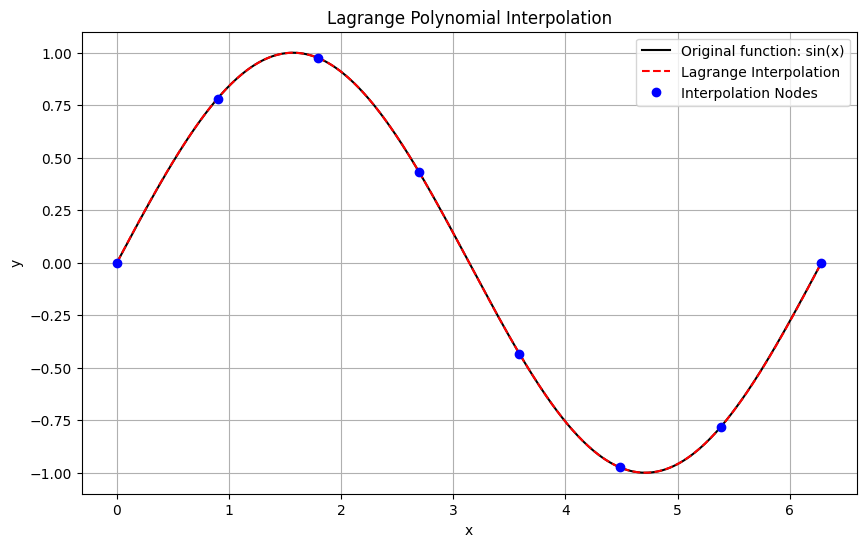

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_basis(x, x_points, j):
    basis = 1
    for m, xm in enumerate(x_points):
        if m != j:
            basis *= (x - xm) / (x_points[j] - xm)
    return basis

def lagrange_interpolation(x, x_points, y_points):
    L = 0
    for j in range(len(x_points)):
        L += y_points[j] * lagrange_basis(x, x_points, j)
    return L

def f(x):
    return np.sin(x)

x_nodes = np.linspace(0, 2*np.pi, 8)
y_nodes = f(x_nodes)

x_dense = np.linspace(0, 2*np.pi, 400)
y_dense_interp = [lagrange_interpolation(x, x_nodes, y_nodes) for x in x_dense]
y_dense_true = f(x_dense)

plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_dense_true, 'k-', label='Original function: sin(x)')
plt.plot(x_dense, y_dense_interp, 'r--', label='Lagrange Interpolation')
plt.plot(x_nodes, y_nodes, 'bo', label='Interpolation Nodes')
plt.title('Lagrange Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# 17.5 ：Newton’s Polynomial Interpolation

*   The Newton polynomial interpolation method constructs interpolating polynomials step-by-step using fractional differences


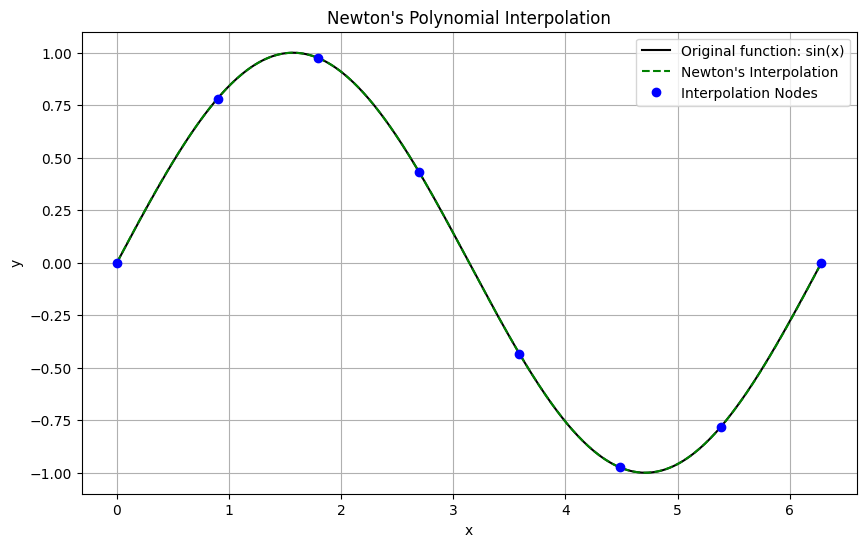

In [4]:
def divided_differences(x_points, y_points):
    n = len(x_points)
    coef = np.copy(y_points).astype(float)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x_points[j:n] - x_points[0:n-j])
    return coef

def newton_polynomial(x, x_points, coef):
    n = len(coef)
    N = coef[0]
    cumulative_product = 1.0
    for i in range(1, n):
        cumulative_product *= (x - x_points[i-1])
        N += coef[i] * cumulative_product
    return N

coef = divided_differences(x_nodes, y_nodes)

y_newton_interp = [newton_polynomial(x, x_nodes, coef) for x in x_dense]

plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_dense_true, 'k-', label='Original function: sin(x)')
plt.plot(x_dense, y_newton_interp, 'g--', label="Newton's Interpolation")
plt.plot(x_nodes, y_nodes, 'bo', label='Interpolation Nodes')
plt.title("Newton's Polynomial Interpolation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()